<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/projects/DylaLaurUnit7Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!



###Clutter

In [3]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-5n20r4nb
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-5n20r4nb
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=962116cb037bc10f322eec40b45b67687501bb1a7f2a201728887b035917731c
  Stored in directory: /tmp/pip-ephem-wheel-cache-t6g3ozhi/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.2 MB/s eta 0:00:00
   ━

In [4]:
!pip install "preliz[full,notebook]"
import preliz as pz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.2
    Uninstalling nbclient-0.10.2:
      Successfully uninstalled nbclient-0.10.2


In [5]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm
import bambi as bmb

##Introduction:

For This project I decided to take on the job of forcasing the performance of a BMW M4 Competition's track time as it goes through different iterations on different days.

This data was used at a forcasting competition and includes a training dataset and a Testing dataset.

I got this data from [here](https://hackernoon.com/10-best-datasets-for-time-series-analysis)

In [10]:
#Here is the M4 test file
url_M4Test = 'https://raw.githubusercontent.com/Dyl-cmyk/datascience/refs/heads/main/Daily-test%20-%20Daily-test.csv'
Test = pd.read_csv(url_M4Test)

In [7]:
Test

,Day,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,D1,2039.20,2035.00,2051.80,2061.80,2063.50,2069.50,2054.00,2057.00,2062.80,2066.40,2067.40,2071.40,2083.80,2080.60
1,D2,2986.00,3001.20,2975.90,2996.10,2981.90,2985.50,2975.80,2956.20,2964.70,2989.00,2991.40,3024.90,3070.80,3076.90
2,D3,1120.70,1117.90,1115.10,1112.30,1109.50,1106.70,1103.90,1101.10,1098.30,1095.50,1092.70,1089.90,1087.10,1084.30
3,D4,1190.00,1162.00,1134.00,1106.00,1078.00,1050.00,1022.00,994.00,966.00,938.00,910.00,1428.00,1400.00,1372.00
4,D5,5904.67,5917.05,5922.58,5928.80,5935.29,6002.80,6009.47,6014.82,6020.19,6072.49,6077.72,6080.23,6082.75,6108.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,D4223,3050.00,3125.00,3262.00,3262.00,3520.00,3520.00,3515.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00
4223,D4224,3719.00,3754.00,3754.00,3721.00,3730.00,3727.00,3700.00,3700.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00
4224,D4225,4014.00,4023.00,4056.00,4070.00,4085.00,4095.00,4118.00,4110.00,4159.00,4167.00,4145.00,4168.00,4068.00,4066.00
4225,D4226,1486.22,1501.39,1502.15,1497.64,1489.72,1494.75,1497.41,1500.57,1492.20,1489.08,1495.56,1488.21,1493.63,1487.30


As i've stared to learn...starting simple is a lot less of a headache than going all out for exactly what I want. With that being said I am going to start by using Days to perdict Laptime and see what that relatonship looks like. My assumption is that there will me some kind of change in the lap time across evey month as track conditions change.

And I guess we just start now...

In [19]:
#it was getting mad so i had to remove the D in front of day
for index, item in enumerate(Test.Day):
  thing= item.replace("D", "")
  Test.Day[index]= thing

Streaming output truncated to the last 5000 lines.
<ipython-input-19-37d41366fa87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.Day[index]= thing
<ipython-input-19-37d41366fa87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.Day[index]= thing
<ipython-input-19-37d41366fa87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.Day[index]= thing
<ipython-input-19-37d41366fa87>:4: SettingWithCopyWarning: 
A value is tryin

In [20]:
Test.Day=Test.Day.astype(int)
Test

,Day,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,2039.20,2035.00,2051.80,2061.80,2063.50,2069.50,2054.00,2057.00,2062.80,2066.40,2067.40,2071.40,2083.80,2080.60
1,2,2986.00,3001.20,2975.90,2996.10,2981.90,2985.50,2975.80,2956.20,2964.70,2989.00,2991.40,3024.90,3070.80,3076.90
2,3,1120.70,1117.90,1115.10,1112.30,1109.50,1106.70,1103.90,1101.10,1098.30,1095.50,1092.70,1089.90,1087.10,1084.30
3,4,1190.00,1162.00,1134.00,1106.00,1078.00,1050.00,1022.00,994.00,966.00,938.00,910.00,1428.00,1400.00,1372.00
4,5,5904.67,5917.05,5922.58,5928.80,5935.29,6002.80,6009.47,6014.82,6020.19,6072.49,6077.72,6080.23,6082.75,6108.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,4223,3050.00,3125.00,3262.00,3262.00,3520.00,3520.00,3515.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00
4223,4224,3719.00,3754.00,3754.00,3721.00,3730.00,3727.00,3700.00,3700.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00
4224,4225,4014.00,4023.00,4056.00,4070.00,4085.00,4095.00,4118.00,4110.00,4159.00,4167.00,4145.00,4168.00,4068.00,4066.00
4225,4226,1486.22,1501.39,1502.15,1497.64,1489.72,1494.75,1497.41,1500.57,1492.20,1489.08,1495.56,1488.21,1493.63,1487.30


In [21]:
#Cant forget to do this
Day = Test["Day"].values[:,None]
LT = Test["V1"].values

##First Run

In [ ]:
#ig stands for inverse gamma
def get_ig_params(x_vals, l_b=None, u_b=None, mass=0.96, plot=False):
    """
    Returns a weakly informative prior for the length-scale parameter of the GP kernel.
    """

    differences = np.abs(np.subtract.outer(x_vals, x_vals))
    if l_b is None:
        l_b = np.min(differences[differences != 0]) * 2
    if u_b is None:
        u_b = np.max(differences) / 1.5

    dist = pz.InverseGamma()
    pz.maxent(dist, l_b, u_b, mass, plot=plot)

    return dict(zip(dist.param_names, dist.params))

In [ ]:
prior_gp = {
    "sigma": bmb.Prior("Gamma", mu=1, sigma=0.01),
    "ell": bmb.Prior("InverseGamma", **get_ig_params(Day))
}

priors = {
    "hsgp(Day, m=10, c=1.5)": prior_gp,
    "alpha": bmb.Prior("HalfNormal", sigma=1)
}

model_hsb = bmb.Model("V1 ~ 0 + hsgp(Day, m=10, c=1.5)", Test, priors=priors)
idata_hsb = model_hsb.fit()

Output()

ERROR:pymc.stats.convergence:There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


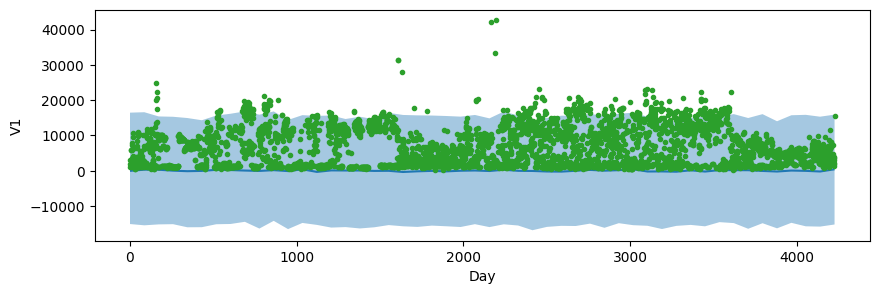

In [ ]:
_, ax = bmb.interpret.plot_predictions(model_hsb, idata_hsb, ["Day"],
                                       pps = True,
                                       fig_kwargs={"figsize": (10, 3)})
ax[0].plot(Test["Day"].values, Test["V1"].values, "C2.")

##Now What...

So....What we have learned today is that when looking at the same version of a car it is rather consistent. GPs are meant to measure changes in timeseires data. This is what happens when you try to make the shoe fit something it's not supposed to

Now, the plan is to do what I wanted to origionally and compare each of the Versions vs the day and see which version is the most consistent

###Lotsa Code

In [25]:

model_M4V1_bmb = bmb.Model("Day ~ V1", Test, family = "gaussian")
idata_M4V1_bmb = model_M4V1_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [26]:
#Now for Version 2
model_M4V2_bmb = bmb.Model("Day ~ V2", Test, family = "gaussian")
idata_M4V2_bmb = model_M4V2_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [27]:
#V3 and So on
model_M4V3_bmb = bmb.Model("Day ~ V3", Test, family = "gaussian")
idata_M4V3_bmb = model_M4V3_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [28]:
model_M4V4_bmb = bmb.Model("Day ~ V4", Test, family = "gaussian")
idata_M4V4_bmb = model_M4V4_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [29]:
model_M4V5_bmb = bmb.Model("Day ~ V5", Test, family = "gaussian")
idata_M4V5_bmb = model_M4V5_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [30]:
model_M4V6_bmb = bmb.Model("Day ~ V6", Test, family = "gaussian")
idata_M4V6_bmb = model_M4V6_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [31]:
model_M4V7_bmb = bmb.Model("Day ~ V7", Test, family = "gaussian")
idata_M4V7_bmb = model_M4V7_bmb.fit(idata_kwargs={"log_likelihood":True})
model_M4V8_bmb = bmb.Model("Day ~ V8", Test, family = "gaussian")
idata_M4V8_bmb = model_M4V8_bmb.fit(idata_kwargs={"log_likelihood":True})
model_M4V9_bmb = bmb.Model("Day ~ V9", Test, family = "gaussian")
idata_M4V9_bmb = model_M4V9_bmb.fit(idata_kwargs={"log_likelihood":True})
#im shocked it lets me do this

Output()

Output()

Output()

In [32]:
#might as well do all 14
model_M4V10_bmb = bmb.Model("Day ~ V10", Test, family = "gaussian")
idata_M4V10_bmb = model_M4V10_bmb.fit(idata_kwargs={"log_likelihood":True})
model_M4V11_bmb = bmb.Model("Day ~ V11", Test, family = "gaussian")
idata_M4V11_bmb = model_M4V11_bmb.fit(idata_kwargs={"log_likelihood":True})
model_M4V12_bmb = bmb.Model("Day ~ V12", Test, family = "gaussian")
idata_M4V12_bmb = model_M4V12_bmb.fit(idata_kwargs={"log_likelihood":True})
model_M4V13_bmb = bmb.Model("Day ~ V13", Test, family = "gaussian")
idata_M4V13_bmb = model_M4V13_bmb.fit(idata_kwargs={"log_likelihood":True})
model_M4V14_bmb = bmb.Model("Day ~ V14", Test, family = "gaussian")
idata_M4V14_bmb = model_M4V14_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Output()

Output()

###Loo and Comparisons

In [33]:
#Im comparing the first 5 of these to see how much of a difference there is between them. I don't expect anyting but I wanna see
cmp_df_bmb = az.compare( {"V1 Lap time":idata_M4V1_bmb,"V2 Lap times":idata_M4V2_bmb,"V3 Lap times":idata_M4V3_bmb,"V4 Lap times":idata_M4V4_bmb,"V5 Lap times":idata_M4V5_bmb} )
cmp_df_bmb

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
V4 Lap times,0,-36039.745266,2.197714,0.000000,1.000000e+00,29.239766,0.000000,False,log
V5 Lap times,1,-36039.759548,2.213247,0.014281,6.938894e-16,29.228363,0.050349,False,log
V3 Lap times,2,-36039.845110,2.172541,0.099844,0.000000e+00,29.214540,0.095363,False,log
V1 Lap time,3,-36039.878978,2.207408,0.133712,0.000000e+00,29.231056,0.084246,False,log
V2 Lap times,4,-36039.918605,2.237481,0.173339,0.000000e+00,29.226905,0.098997,False,log


It seems like there is actually difference between the datasets, and it is not corrorlated to the version number (not just 1 is best 5 is worst etc). But its so tiny that the data is basically equivelent in every way...now onto why we are actually here

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

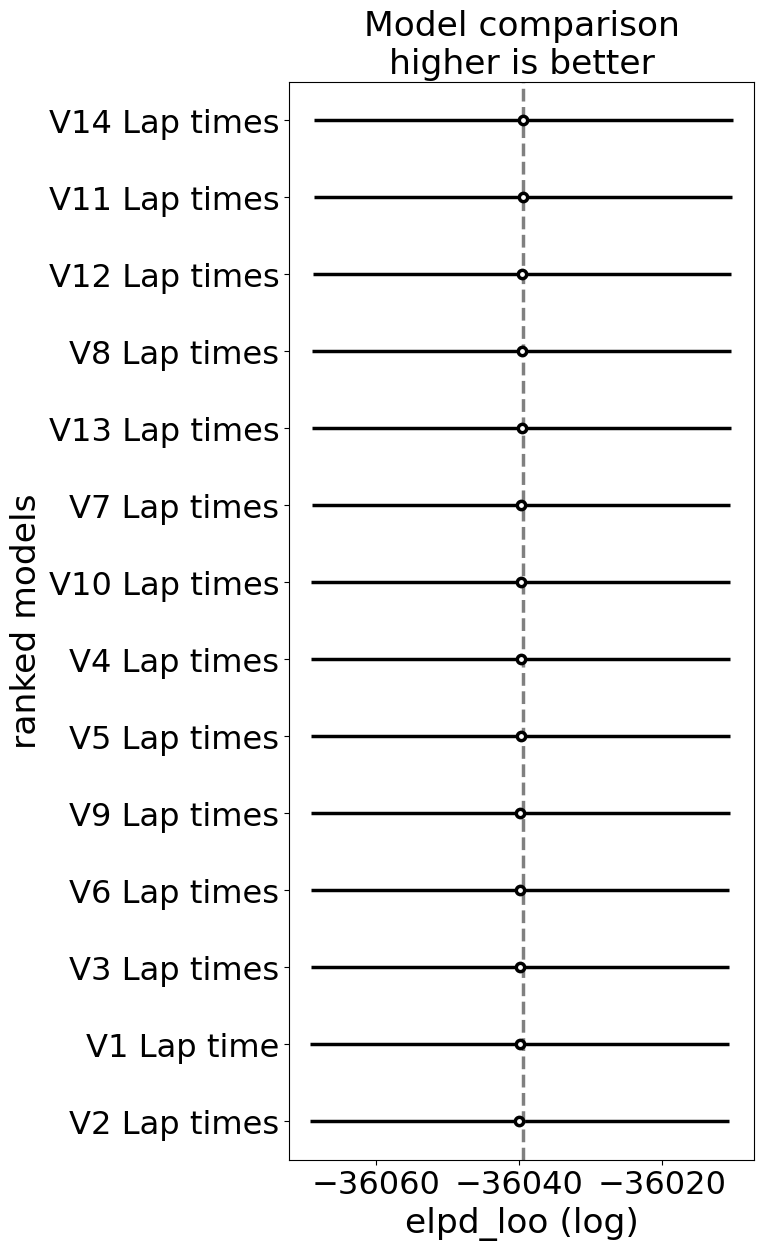

In [34]:
#plz dont get mad code
cmp_df2 = az.compare( {"V1 Lap time":idata_M4V1_bmb,"V2 Lap times":idata_M4V2_bmb,"V3 Lap times":idata_M4V3_bmb,"V4 Lap times":idata_M4V4_bmb,"V5 Lap times":idata_M4V5_bmb, "V6 Lap times":idata_M4V6_bmb,"V7 Lap times":idata_M4V7_bmb, "V8 Lap times":idata_M4V8_bmb, "V9 Lap times":idata_M4V9_bmb, "V10 Lap times":idata_M4V10_bmb, "V11 Lap times":idata_M4V11_bmb, "V12 Lap times":idata_M4V12_bmb,"V13 Lap times":idata_M4V13_bmb, "V14 Lap times":idata_M4V14_bmb} )

#0 is the best rank; we want a lower elpd_loo
cmp_df2
az.plot_compare(cmp_df2)

So...this is actually pretty cool. This data shows, pretty accurately the design process of a the cars, AND how little time they are actually fighting for. Obvously version 14 is the fastest, but what's intresting is to see how v1 was this good and then they tried to change something and made it worse, then they changed it back and did something else to v3 which made it better, THEN they got lucky with v4 and it took them a while to get back to that point.

We see this kind of progressions and regression a lot in motorsports and its cool to see here as well.

This data does tell us pretty clearly that v14 is the best, but not by much. I'd say the most humbling part about all of this is the fact that you cant always make the shoe fit. Sometimes simpler is better. Its almost like I should have listened to Mr.A at the start... :/